# 군집화(Clustering) - K-Means Algorithm

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

### Iris 데이터를 차원 축소

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
iris = load_iris()
scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [6]:
iris_df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
iris_df['pca_x'] = iris_pca[:, 0]
iris_df['pca_y'] = iris_pca[:, 1]
iris_df.head()

,sl,sw,pl,pw,pca_x,pca_y
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,-2.389842,0.646835


### K-Means 모델 생성/학습

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [9]:
kmeans.fit(iris_std)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [10]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_df.tail()

,sl,sw,pl,pw,pca_x,pca_y,target,cluster
145,6.7,3.0,5.2,2.3,1.870503,0.386966,2,0
146,6.3,2.5,5.0,1.9,1.564580,-0.896687,2,2
147,6.5,3.0,5.2,2.0,1.521170,0.269069,2,0
148,6.2,3.4,5.4,2.3,1.372788,1.011254,2,0
149,5.9,3.0,5.1,1.8,0.960656,-0.024332,2,2


In [11]:
clustering_result = iris_df.groupby(['target','cluster']).count()
clustering_result

sl  sw  pl  pw  pca_x  pca_y
target cluster                              
0      1        50  50  50  50     50     50
1      0        11  11  11  11     11     11
       2        39  39  39  39     39     39
2      0        36  36  36  36     36     36
       2        14  14  14  14     14     14

### 데이터시각화

- 군집화한 결과를 차원축소하여 시각화

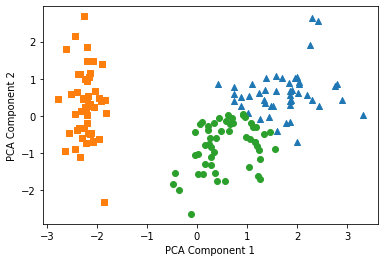

In [14]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df.cluster == i]['pca_x']
    y_axis_data = iris_df[iris_df.cluster == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- 원 데이터를 차원축소하여 시각화

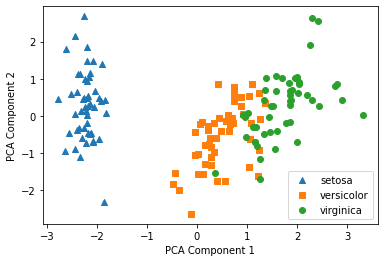

In [16]:
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df.target == i]['pca_x']
    y_axis_data = iris_df[iris_df.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- 비교 그림

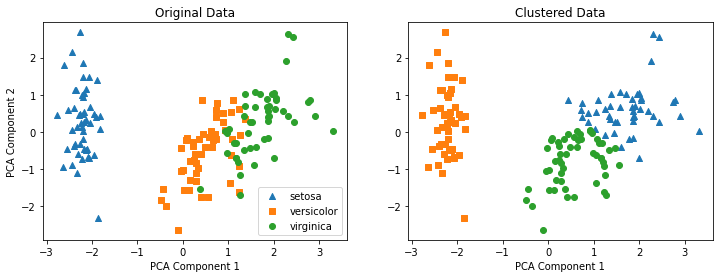

In [18]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = iris_df[iris_df[column] == i]['pca_x']
        y_axis_data = iris_df[iris_df[column] == i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                   label=iris.target_names[i])

    if k==0:    # target인 경우
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else:       # cluster인 경우
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')